In [ ]:
# Setting

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torchsummary import summary
from tqdm import tqdm

In [ ]:
# Global Variable For training
# You just use the following hyper-parameters
BATCH_SIZE = 100                      #한번에 모델에 입력되는 데이터개수
NUM_EPOCH = 50                        #전체 데이터셋을 몇번 반복하여 학습할지 나타냄
LEARNING_RATE = 0.01                  #모델이 학습하는 속도 조절, 빠를수록 빠르지만 빠르다고 최적화 되는건 아님
CRITERION = nn.CrossEntropyLoss()     #손실함수, 크로스엔트로피로 확률로서 평가

In [ ]:
# CIFAR10 Dataset
train_dataset = dsets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)   #데이터셋 로드 및 훈련과 데스트에 필요한 데이터 준비

In [ ]:
def fit(model,train_loader):
    model.train()
    device = next(model.parameters()).device.index
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    losses = []
    for i, data in enumerate(train_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)

        pred_label = model(image)
        loss = CRITERION(pred_label, label)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    avg_loss = sum(losses)/len(losses)
    return avg_loss                                        #모델을 학습하고 평균 손실값 반환

In [ ]:
def eval(model, test_loader):
    model.eval()
    device = next(model.parameters()).device.index
    pred_labels = []
    real_labels = []

    for i, data in enumerate(test_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)
        real_labels += list(label.cpu().detach().numpy())

        pred_label = model(image)
        pred_label = list(pred_label.cpu().detach().numpy())
        pred_labels += pred_label

    real_labels = np.array(real_labels)
    pred_labels = np.array(pred_labels)
    pred_labels = pred_labels.argmax(axis=1)
    acc = sum(real_labels==pred_labels)/len(real_labels)*100

    return acc                         #모델을 평가 모드로 설정하고, 실제 값과 예측값 비교하여 정확도를 반환한다.

# Task1: Compare between simple MLP and simple CNN

### MLP

100%|██████████| 50/50 [08:10<00:00,  9.80s/it]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 6272]      19,273,856
              ReLU-2                 [-1, 6272]               0
            Linear-3                 [-1, 4608]      28,905,984
              ReLU-4                 [-1, 4608]               0
         MaxPool2d-5            [-1, 8, 12, 12]               0
            Linear-6                 [-1, 1024]       1,180,672
              ReLU-7                 [-1, 1024]               0
            Linear-8                  [-1, 256]         262,400
              ReLU-9                  [-1, 256]               0
        MaxPool2d-10             [-1, 16, 2, 2]               0
           Linear-11                   [-1, 10]             650
Total params: 49,623,562
Trainable params: 49,623,562
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Fo

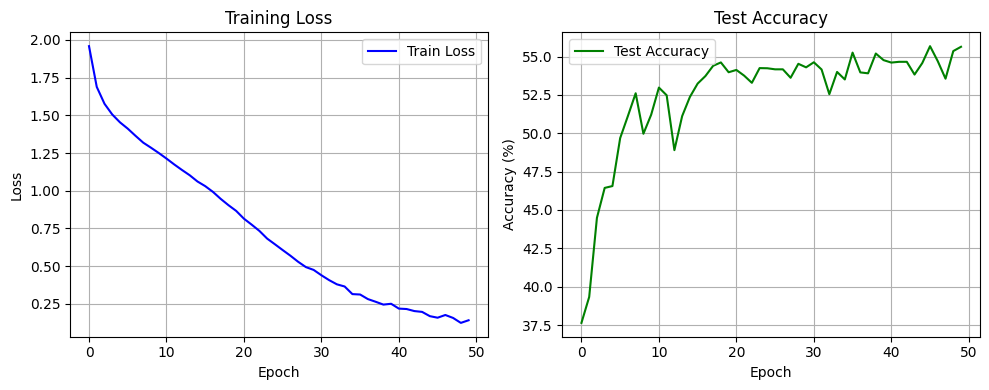

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt

#//-------------------------------------------------------------------------
# Global Variable For training
# You just use the following hyper-parameters
BATCH_SIZE = 100                      #한번에 모델에 입력되는 데이터개수
NUM_EPOCH = 50                        #전체 데이터셋을 몇번 반복하여 학습할지 나타냄
LEARNING_RATE = 0.01                  #모델이 학습하는 속도 조절, 빠를수록 빠르지만 빠르다고 최적화 되는건 아님
CRITERION = nn.CrossEntropyLoss()     #손실함수, 크로스엔트로피로 확률로서 평가
#-----------------------------------------------------------------------------
# CIFAR10 Dataset
train_dataset = dsets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)   #데이터셋 로드 및 훈련과 데스트에 필요한 데이터 준비
#------------------------------------------------------------------------------
def fit(model,train_loader):
    model.train()
    device = next(model.parameters()).device.index
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    losses = []
    for i, data in enumerate(train_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)

        pred_label = model(image)
        loss = CRITERION(pred_label, label)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    avg_loss = sum(losses)/len(losses)
    return avg_loss                                        #모델을 학습하고 평균 손실값 반환
#----------------------------------------------------------------------------------------------
def eval(model, test_loader):
    model.eval()
    device = next(model.parameters()).device.index
    pred_labels = []
    real_labels = []

    for i, data in enumerate(test_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)
        real_labels += list(label.cpu().detach().numpy())

        pred_label = model(image)
        pred_label = list(pred_label.cpu().detach().numpy())
        pred_labels += pred_label

    real_labels = np.array(real_labels)
    pred_labels = np.array(pred_labels)
    pred_labels = pred_labels.argmax(axis=1)
    acc = sum(real_labels==pred_labels)/len(real_labels)*100
    return acc

class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        # Fully-connected layer
        self.fc1_1 = nn.Linear(3*32*32, 8*28*28)
        self.act1_1 = nn.ReLU()
        self.fc1_2 = nn.Linear(8*28*28, 8*24*24)
        self.act1_2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)

        self.fc2_1 = nn.Linear(8*12*12, 16*8*8)
        self.act2_1 = nn.ReLU()
        self.fc2_2 = nn.Linear(16*8*8, 16*4*4)
        self.act2_2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)

        # Output layer
        self.out = nn.Linear(16*2*2, 10)

    def forward(self, x):
        x = x.view(-1, 3*32*32)

        x = self.act1_1(self.fc1_1(x))
        x = self.act1_2(self.fc1_2(x))
        x = x.view(-1, 8, 24, 24)
        x = self.pool1(x)
        x = x.view(-1, 8*12*12)

        x = self.act2_1(self.fc2_1(x))
        x = self.act2_2(self.fc2_2(x))
        x = x.view(-1, 16, 4, 4)
        x = self.pool2(x)
        x = x.view(-1, 16*2*2)

        out = self.out(x)
        return out              #cnn아닌 mlp방식

#-------------------------------------------------------------
mlp_model = SimpleMLP().cuda()
train_loss1 = []
test_accuracy1 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss1.append(fit(mlp_model, train_loader))
    test_accuracy1.append(eval(mlp_model, test_loader))
summary(mlp_model, input_size = (3,32,32))
print("\n🔍 각 레이어별 파라미터 수 (Weight / Bias)\n" + "-"*50)
total_weight = 0
total_bias = 0

for name, param in mlp_model.named_parameters():
    param_count = param.numel()
    if 'weight' in name:
        print(f"{name:<30} | Weight Params: {param_count}")
        total_weight += param_count
    elif 'bias' in name:
        print(f"{name:<30} | Bias Params:   {param_count}")
        total_bias += param_count

print("-"*50)
print(f"총 가중치(Weights): {total_weight:,}")
print(f"총 바이어스(Biases): {total_bias:,}")
print(f"총 파라미터 수: {total_weight + total_bias:,}")


# 학습 손실 시각화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss1, label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# 테스트 정확도 시각화
plt.subplot(1,2,2)
plt.plot(test_accuracy1, label='Test Accuracy', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()






In [ ]:
mlp_model = SimpleMLP().cuda()
train_loss1 = []
test_accuracy1 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss1.append(fit(mlp_model, train_loader))
    test_accuracy1.append(eval(mlp_model, test_loader))
summary(mlp_model, input_size = (3,32,32))

NameError: name 'SimpleMLP' is not defined

### CNN

100%|██████████| 170M/170M [00:13<00:00, 12.7MB/s]
100%|██████████| 50/50 [07:32<00:00,  9.05s/it]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]             608
              ReLU-2            [-1, 8, 28, 28]               0
            Conv2d-3            [-1, 8, 24, 24]           1,608
              ReLU-4            [-1, 8, 24, 24]               0
         MaxPool2d-5            [-1, 8, 12, 12]               0
            Conv2d-6             [-1, 16, 8, 8]           3,216
              ReLU-7             [-1, 16, 8, 8]               0
            Conv2d-8             [-1, 16, 4, 4]           6,416
              ReLU-9             [-1, 16, 4, 4]               0
        MaxPool2d-10             [-1, 16, 2, 2]               0
           Linear-11                   [-1, 10]             650
Total params: 12,498
Trainable params: 12,498
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/ba

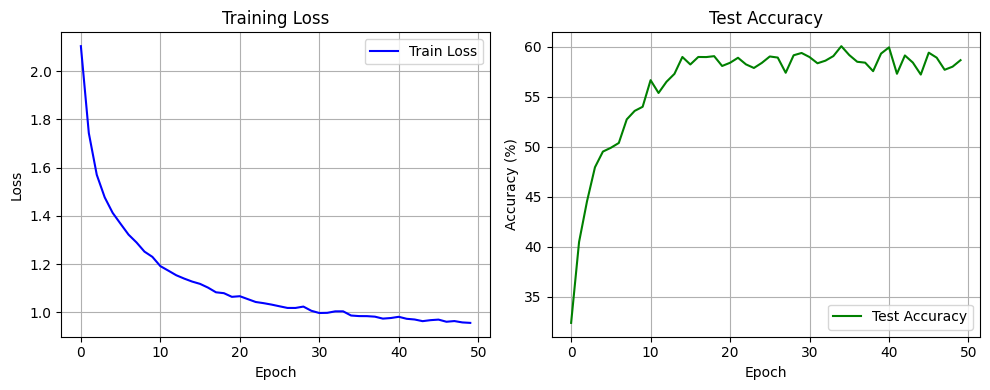

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt

#//-------------------------------------------------------------------------
# Global Variable For training
# You just use the following hyper-parameters
BATCH_SIZE = 100                      #한번에 모델에 입력되는 데이터개수
NUM_EPOCH = 50                        #전체 데이터셋을 몇번 반복하여 학습할지 나타냄
LEARNING_RATE = 0.01                  #모델이 학습하는 속도 조절, 빠를수록 빠르지만 빠르다고 최적화 되는건 아님
CRITERION = nn.CrossEntropyLoss()     #손실함수, 크로스엔트로피로 확률로서 평가
#-----------------------------------------------------------------------------
# CIFAR10 Dataset
train_dataset = dsets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)   #데이터셋 로드 및 훈련과 데스트에 필요한 데이터 준비
#------------------------------------------------------------------------------
def fit(model,train_loader):
    model.train()
    device = next(model.parameters()).device.index
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    losses = []
    for i, data in enumerate(train_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)

        pred_label = model(image)
        loss = CRITERION(pred_label, label)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    avg_loss = sum(losses)/len(losses)
    return avg_loss                                        #모델을 학습하고 평균 손실값 반환
#----------------------------------------------------------------------------------------------
def eval(model, test_loader):
    model.eval()
    device = next(model.parameters()).device.index
    pred_labels = []
    real_labels = []

    for i, data in enumerate(test_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)
        real_labels += list(label.cpu().detach().numpy())

        pred_label = model(image)
        pred_label = list(pred_label.cpu().detach().numpy())
        pred_labels += pred_label

    real_labels = np.array(real_labels)
    pred_labels = np.array(pred_labels)
    pred_labels = pred_labels.argmax(axis=1)
    acc = sum(real_labels==pred_labels)/len(real_labels)*100
    return acc                         #모델을 평가 모드로 설정하고, 실제 값과 예측값 비교하여 정확도를 반환한다.

#---------------------------------------------------------------------------------------------------


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.convol_1 = nn.Conv2d(3, 8, kernel_size = 5)   # 32x32 -> 28x28으로 만들어줌 (3:입력채널수, 8:출력채널수,kernet:필터크기, stride랑 channel은 고정이니 생략)
        self.relu_1 = nn.ReLU()

        self.convol_2 = nn.Conv2d(8, 8, kernel_size = 5)   # 28x28 -> 24x24
        self.relu_2 = nn.ReLU()

        self.pool_1 = nn.MaxPool2d(2)  # 24x24 -> 12x12 (풀링 레이어의 크기를 2로 해줌 즉 크기를 절반으로 만듬)

        self.convol_3 = nn.Conv2d(8, 16, kernel_size = 5)  # 12x12 -> 8x8
        self.relu_3 = nn.ReLU()

        self.convol_4 = nn.Conv2d(16, 16, kernel_size = 5) # 8x8 -> 4x4
        self.relu_4 = nn.ReLU()

        self.pool_2 = nn.MaxPool2d(2)  # 4x4 -> 2x2

        self.fc = nn.Linear(16*2*2, 10)

    def forward(self, x):
        x = self.relu_1(self.convol_1(x))
        x = self.relu_2(self.convol_2(x))
        x = self.pool_1(x)

        x = self.relu_3(self.convol_3(x))
        x = self.relu_4(self.convol_4(x))
        x = self.pool_2(x)

        x = x.view(x.size(0), -1)  #convolution layer전부 거친구 fc연결 해야하므로 flatten작업 실시하기
        out = self.fc(x)
        return out

#-----------------------------------------------------------------------------------
cnn_model = SimpleCNN().cuda()
train_loss2 = []
test_accuracy2 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss2.append(fit(cnn_model, train_loader))
    test_accuracy2.append(eval(cnn_model, test_loader))
summary(cnn_model, input_size = (3,32,32))

print("\n🔍 [SimpleCNN] 각 레이어별 파라미터 수 (Weight / Bias)\n" + "-"*60)
total_weight = 0
total_bias = 0

for name, param in cnn_model.named_parameters():
    param_count = param.numel()
    if 'weight' in name:
        print(f"{name:<35} | Weight Params: {param_count}")
        total_weight += param_count
    elif 'bias' in name:
        print(f"{name:<35} | Bias Params:   {param_count}")
        total_bias += param_count

print("-"*60)
print(f"총 가중치(Weights): {total_weight:,}")
print(f"총 바이어스(Biases): {total_bias:,}")
print(f"총 파라미터 수: {total_weight + total_bias:,}")


# 학습 손실 시각화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss2, label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# 테스트 정확도 시각화
plt.subplot(1,2,2)
plt.plot(test_accuracy2, label='Test Accuracy', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
!pip install --upgrade sympy


In [ ]:
cnn_model = SimpleCNN().cuda()
train_loss2 = []
test_accuracy2 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss2.append(fit(cnn_model, train_loader))
    test_accuracy2.append(eval(cnn_model, test_loader))
summary(cnn_model, input_size = (3,32,32))

# Task 2: Make a simple VGG and ResNet for CIFAR10

### VGG

100%|██████████| 50/50 [08:56<00:00, 10.73s/it]


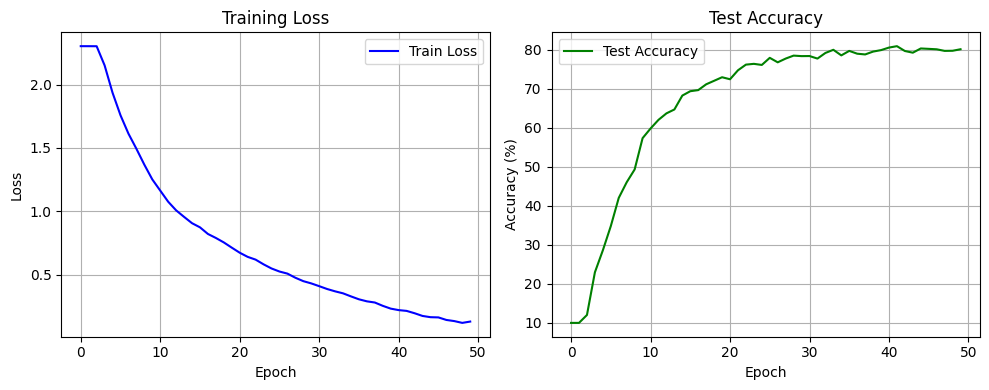

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt

#//-------------------------------------------------------------------------
# Global Variable For training
# You just use the following hyper-parameters
BATCH_SIZE = 100                      #한번에 모델에 입력되는 데이터개수
NUM_EPOCH = 50                        #전체 데이터셋을 몇번 반복하여 학습할지 나타냄
LEARNING_RATE = 0.01                  #모델이 학습하는 속도 조절, 빠를수록 빠르지만 빠르다고 최적화 되는건 아님
CRITERION = nn.CrossEntropyLoss()     #손실함수, 크로스엔트로피로 확률로서 평가
#-----------------------------------------------------------------------------
# CIFAR10 Dataset
train_dataset = dsets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)   #데이터셋 로드 및 훈련과 데스트에 필요한 데이터 준비
#------------------------------------------------------------------------------
def fit(model,train_loader):
    model.train()
    device = next(model.parameters()).device.index
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    losses = []
    for i, data in enumerate(train_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)

        pred_label = model(image)
        loss = CRITERION(pred_label, label)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    avg_loss = sum(losses)/len(losses)
    return avg_loss                                        #모델을 학습하고 평균 손실값 반환
#----------------------------------------------------------------------------------------------
def eval(model, test_loader):
    model.eval()
    device = next(model.parameters()).device.index
    pred_labels = []
    real_labels = []

    for i, data in enumerate(test_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)
        real_labels += list(label.cpu().detach().numpy())

        pred_label = model(image)
        pred_label = list(pred_label.cpu().detach().numpy())
        pred_labels += pred_label

    real_labels = np.array(real_labels)
    pred_labels = np.array(pred_labels)
    pred_labels = pred_labels.argmax(axis=1)
    acc = sum(real_labels==pred_labels)/len(real_labels)*100
    return acc                         #모델을 평가 모드로 설정하고, 실제 값과 예측값 비교하여 정확도를 반환한다.

#---------------------------------------------------------------------------------------------------

class SimpleVGG(nn.Module):
    def __init__(self):
        super(SimpleVGG, self).__init__()

        self.convol1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.convol2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.convol3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.convol4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.convol5 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.relu5 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.convol6 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu6 = nn.ReLU()
        self.convol7= nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.relu7 = nn.ReLU()
        self.convol8 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.relu8 = nn.ReLU()
        self.pool3 = nn.AvgPool2d(kernel_size=8, stride = 8)

        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu1(self.convol1(x))
        x = self.relu2(self.convol2(x))
        x = self.pool1(x)

        x = self.relu3(self.convol3(x))
        x = self.relu4(self.convol4(x))
        x = self.relu5(self.convol5(x))
        x = self.pool2(x)

        x = self.relu6(self.convol6(x))
        x = self.relu7(self.convol7(x))
        x = self.relu8(self.convol8(x))

        x = self.pool3(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


vgg_model = SimpleVGG().cuda()
train_loss3 = []
test_accuracy3 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss3.append(fit(vgg_model, train_loader))
    test_accuracy3.append(eval(vgg_model, test_loader))

# 학습 손실 그래프화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss3, label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# 테스트 정확도 그래프화
plt.subplot(1,2,2)
plt.plot(test_accuracy3, label='Test Accuracy', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
vgg_model = SimpleVGG().cuda()
train_loss3 = []
test_accuracy3 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss3.append(fit(vgg_model, train_loader))
    test_accuracy3.append(eval(vgg_model, test_loader))

### ResNet

100%|██████████| 50/50 [09:36<00:00, 11.53s/it]



🔍 [SimpleCNN] 각 레이어별 파라미터 수 (Weight / Bias)
------------------------------------------------------------
convol_1.weight                     | Weight Params: 600
convol_1.bias                       | Bias Params:   8
convol_2.weight                     | Weight Params: 1600
convol_2.bias                       | Bias Params:   8
convol_3.weight                     | Weight Params: 3200
convol_3.bias                       | Bias Params:   16
convol_4.weight                     | Weight Params: 6400
convol_4.bias                       | Bias Params:   16
fc.weight                           | Weight Params: 640
fc.bias                             | Bias Params:   10
------------------------------------------------------------
총 가중치(Weights): 12,440
총 바이어스(Biases): 58
총 파라미터 수: 12,498


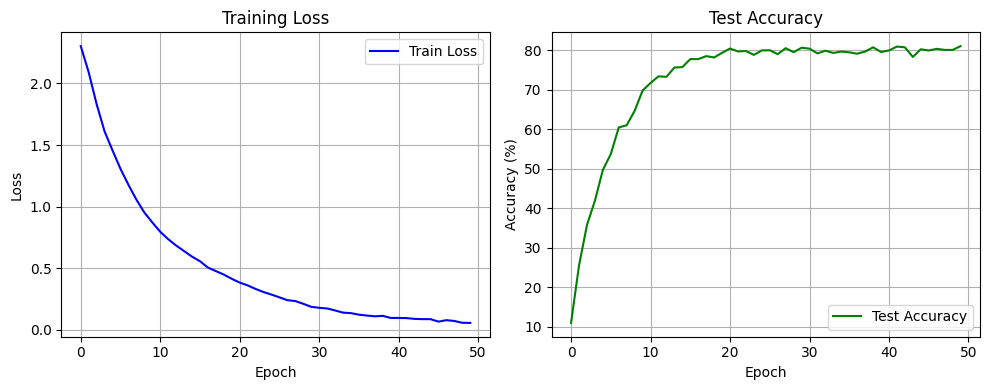

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt

#//-------------------------------------------------------------------------
# Global Variable For training
# You just use the following hyper-parameters
BATCH_SIZE = 100                      #한번에 모델에 입력되는 데이터개수
NUM_EPOCH = 50                        #전체 데이터셋을 몇번 반복하여 학습할지 나타냄
LEARNING_RATE = 0.01                  #모델이 학습하는 속도 조절, 빠를수록 빠르지만 빠르다고 최적화 되는건 아님
CRITERION = nn.CrossEntropyLoss()     #손실함수, 크로스엔트로피로 확률로서 평가
#-----------------------------------------------------------------------------
# CIFAR10 Dataset
train_dataset = dsets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)   #데이터셋 로드 및 훈련과 데스트에 필요한 데이터 준비
#------------------------------------------------------------------------------
def fit(model,train_loader):
    model.train()
    device = next(model.parameters()).device.index
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    losses = []
    for i, data in enumerate(train_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)

        pred_label = model(image)
        loss = CRITERION(pred_label, label)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    avg_loss = sum(losses)/len(losses)
    return avg_loss                                        #모델을 학습하고 평균 손실값 반환
#----------------------------------------------------------------------------------------------
def eval(model, test_loader):
    model.eval()
    device = next(model.parameters()).device.index
    pred_labels = []
    real_labels = []

    for i, data in enumerate(test_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)
        real_labels += list(label.cpu().detach().numpy())

        pred_label = model(image)
        pred_label = list(pred_label.cpu().detach().numpy())
        pred_labels += pred_label

    real_labels = np.array(real_labels)
    pred_labels = np.array(pred_labels)
    pred_labels = pred_labels.argmax(axis=1)
    acc = sum(real_labels==pred_labels)/len(real_labels)*100
    return acc                         #모델을 평가 모드로 설정하고, 실제 값과 예측값 비교하여 정확도를 반환한다.

#---------------------------------------------------------------------------------------------------

class ResBlock(nn.Module):
    def __init__(self, channels):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        identity = x
        out = self.relu(self.conv1(x))
        out = self.conv2(out)
        out += identity
        out = self.relu(out)
        return out

class SimpleResNet(nn.Module):
    def __init__(self):
        super(SimpleResNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.resblock1 = ResBlock(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.resblock2 = ResBlock(128)
        self.pool3 = nn.AvgPool2d(kernel_size=8, stride=8)

        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.pool1(x)

        x = self.relu3(self.conv3(x))
        x = self.resblock1(x)
        x = self.pool2(x)

        x = self.relu4(self.conv4(x))
        x = self.resblock2(x)
        x = self.pool3(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


resnet_model = SimpleResNet().cuda()
train_loss4 = []
test_accuracy4 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss4.append(fit(resnet_model, train_loader))
    test_accuracy4.append(eval(resnet_model, test_loader))

print("\n🔍 [SimpleCNN] 각 레이어별 파라미터 수 (Weight / Bias)\n" + "-"*60)
total_weight = 0
total_bias = 0

for name, param in cnn_model.named_parameters():
    param_count = param.numel()
    if 'weight' in name:
        print(f"{name:<35} | Weight Params: {param_count}")
        total_weight += param_count
    elif 'bias' in name:
        print(f"{name:<35} | Bias Params:   {param_count}")
        total_bias += param_count

print("-"*60)
print(f"총 가중치(Weights): {total_weight:,}")
print(f"총 바이어스(Biases): {total_bias:,}")
print(f"총 파라미터 수: {total_weight + total_bias:,}")


# 학습 손실 그래프화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss4, label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# 테스트 정확도 그래프화
plt.subplot(1,2,2)
plt.plot(test_accuracy4, label='Test Accuracy', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
resnet_model = SimpleResNet().cuda()
train_loss4 = []
test_accuracy4 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss4.append(fit(resnet_model, train_loader))
    test_accuracy4.append(eval(resnet_model, test_loader))

# Task 3 : Use various regularizers

### ResNet + Batch Normalization

100%|██████████| 50/50 [09:36<00:00, 11.54s/it]


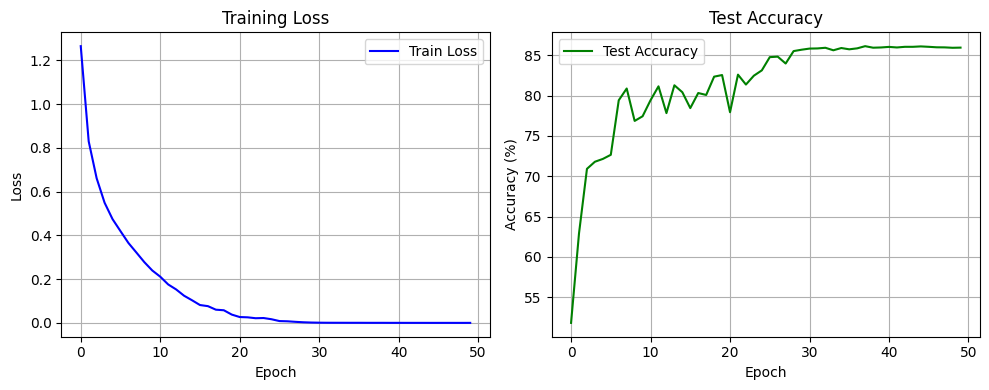

In [2]:
import numpy as np

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt

#//-------------------------------------------------------------------------
# Global Variable For training
# You just use the following hyper-parameters
BATCH_SIZE = 100                      #한번에 모델에 입력되는 데이터개수
NUM_EPOCH = 50                        #전체 데이터셋을 몇번 반복하여 학습할지 나타냄
LEARNING_RATE = 0.01                  #모델이 학습하는 속도 조절, 빠를수록 빠르지만 빠르다고 최적화 되는건 아님
CRITERION = nn.CrossEntropyLoss()     #손실함수, 크로스엔트로피로 확률로서 평가
#-----------------------------------------------------------------------------
# CIFAR10 Dataset
train_dataset = dsets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)   #데이터셋 로드 및 훈련과 데스트에 필요한 데이터 준비
#------------------------------------------------------------------------------
def fit(model,train_loader):
    model.train()
    device = next(model.parameters()).device.index
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    losses = []
    for i, data in enumerate(train_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)

        pred_label = model(image)
        loss = CRITERION(pred_label, label)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    avg_loss = sum(losses)/len(losses)
    return avg_loss                                        #모델을 학습하고 평균 손실값 반환
#----------------------------------------------------------------------------------------------
def eval(model, test_loader):
    model.eval()
    device = next(model.parameters()).device.index
    pred_labels = []
    real_labels = []

    for i, data in enumerate(test_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)
        real_labels += list(label.cpu().detach().numpy())

        pred_label = model(image)
        pred_label = list(pred_label.cpu().detach().numpy())
        pred_labels += pred_label

    real_labels = np.array(real_labels)
    pred_labels = np.array(pred_labels)
    pred_labels = pred_labels.argmax(axis=1)
    acc = sum(real_labels==pred_labels)/len(real_labels)*100
    return acc                         #모델을 평가 모드로 설정하고, 실제 값과 예측값 비교하여 정확도를 반환한다.

#---------------------------------------------------------------------------------------------------

class ResBlock(nn.Module):
    def __init__(self, channels):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(channels)

    def forward(self, x):
        identity = x
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        out = self.relu(out)
        return out

class ResNetBN(nn.Module):
    def __init__(self):
        super(ResNetBN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()

        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()

        self.resblock1 = ResBlock(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.relu4 = nn.ReLU()

        self.resblock2 = ResBlock(128)
        self.pool3 = nn.AvgPool2d(kernel_size=8, stride=8)

        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu1(self.bn1(self.conv1(x)))
        x = self.relu2(self.bn2(self.conv2(x)))
        x = self.pool1(x)

        x = self.relu3(self.bn3(self.conv3(x)))
        x = self.resblock1(x)
        x = self.pool2(x)

        x = self.relu4(self.bn4(self.conv4(x)))
        x = self.resblock2(x)
        x = self.pool3(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x



resnet_bn_model = ResNetBN().cuda()
train_loss5 = []
test_accuracy5 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss5.append(fit(resnet_bn_model, train_loader))
    test_accuracy5.append(eval(resnet_bn_model, test_loader))



# 학습 손실 그래프화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss5, label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# 테스트 정확도 그래프화
plt.subplot(1,2,2)
plt.plot(test_accuracy5, label='Test Accuracy', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
resnet_bn_model = ResNetBN().cuda()
train_loss5 = []
test_accuracy5 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss5.append(fit(resnet_bn_model, train_loader))
    test_accuracy5.append(eval(resnet_bn_model, test_loader))

### ResNet + Dropout(p=0.5)

100%|██████████| 50/50 [08:52<00:00, 10.66s/it]


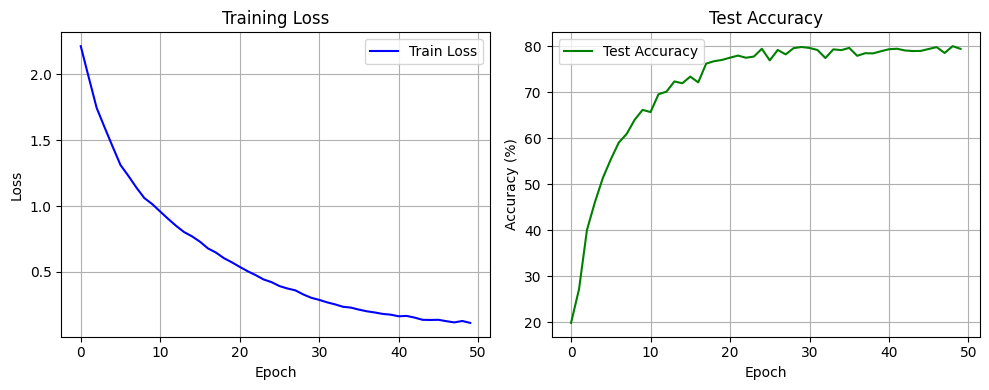

In [3]:
import numpy as np

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt

#//-------------------------------------------------------------------------
# Global Variable For training
# You just use the following hyper-parameters
BATCH_SIZE = 100                      #한번에 모델에 입력되는 데이터개수
NUM_EPOCH = 50                        #전체 데이터셋을 몇번 반복하여 학습할지 나타냄
LEARNING_RATE = 0.01                  #모델이 학습하는 속도 조절, 빠를수록 빠르지만 빠르다고 최적화 되는건 아님
CRITERION = nn.CrossEntropyLoss()     #손실함수, 크로스엔트로피로 확률로서 평가
#-----------------------------------------------------------------------------
# CIFAR10 Dataset
train_dataset = dsets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)   #데이터셋 로드 및 훈련과 데스트에 필요한 데이터 준비
#------------------------------------------------------------------------------
def fit(model,train_loader):
    model.train()
    device = next(model.parameters()).device.index
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    losses = []
    for i, data in enumerate(train_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)

        pred_label = model(image)
        loss = CRITERION(pred_label, label)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    avg_loss = sum(losses)/len(losses)
    return avg_loss                                        #모델을 학습하고 평균 손실값 반환
#----------------------------------------------------------------------------------------------
def eval(model, test_loader):
    model.eval()
    device = next(model.parameters()).device.index
    pred_labels = []
    real_labels = []

    for i, data in enumerate(test_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)
        real_labels += list(label.cpu().detach().numpy())

        pred_label = model(image)
        pred_label = list(pred_label.cpu().detach().numpy())
        pred_labels += pred_label

    real_labels = np.array(real_labels)
    pred_labels = np.array(pred_labels)
    pred_labels = pred_labels.argmax(axis=1)
    acc = sum(real_labels==pred_labels)/len(real_labels)*100
    return acc                         #모델을 평가 모드로 설정하고, 실제 값과 예측값 비교하여 정확도를 반환한다.

#---------------------------------------------------------------------------------------------------

class ResBlock(nn.Module):
    def __init__(self, channels):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        identity = x
        out = self.relu(self.conv1(x))
        out = self.conv2(out)
        out += identity
        out = self.relu(out)
        return out

class ResNetDO(nn.Module):
    def __init__(self):
        super(ResNetDO, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.resblock1 = ResBlock(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.resblock2 = ResBlock(128)
        self.pool3 = nn.AvgPool2d(kernel_size=8, stride=8)

        self.dropout = nn.Dropout(p=0.5)
        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.pool1(x)

        x = self.relu3(self.conv3(x))
        x = self.resblock1(x)
        x = self.pool2(x)

        x = self.relu4(self.conv4(x))
        x = self.resblock2(x)
        x = self.pool3(x)

        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

resnet_do_model = ResNetDO().cuda()
train_loss6 = []
test_accuracy6 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss6.append(fit(resnet_do_model, train_loader))
    test_accuracy6.append(eval(resnet_do_model, test_loader))




# 학습 손실 그래프화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss6, label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# 테스트 정확도 그래프화
plt.subplot(1,2,2)
plt.plot(test_accuracy6, label='Test Accuracy', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
resnet_do_model = ResNetDO().cuda()
train_loss6 = []
test_accuracy6 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss6.append(fit(resnet_do_model, train_loader))
    test_accuracy6.append(eval(resnet_do_model, test_loader))

### VGG + Weight Decay (5e-4)

100%|██████████| 50/50 [08:56<00:00, 10.74s/it]


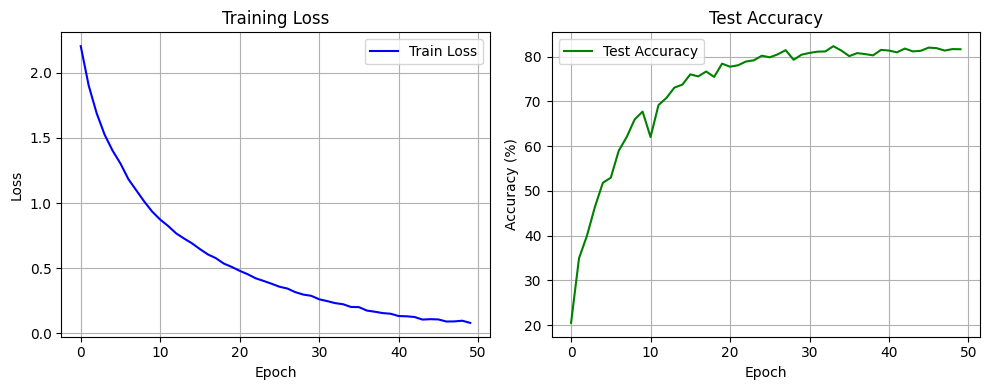

In [4]:
import numpy as np

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt

#//-------------------------------------------------------------------------
# Global Variable For training
# You just use the following hyper-parameters
BATCH_SIZE = 100                      #한번에 모델에 입력되는 데이터개수
NUM_EPOCH = 50                        #전체 데이터셋을 몇번 반복하여 학습할지 나타냄
LEARNING_RATE = 0.01                  #모델이 학습하는 속도 조절, 빠를수록 빠르지만 빠르다고 최적화 되는건 아님
CRITERION = nn.CrossEntropyLoss()     #손실함수, 크로스엔트로피로 확률로서 평가
#-----------------------------------------------------------------------------
# CIFAR10 Dataset
train_dataset = dsets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)   #데이터셋 로드 및 훈련과 데스트에 필요한 데이터 준비
#------------------------------------------------------------------------------
def fit_WD(model,train_loader):
    device = next(model.parameters()).device.index
    model.train()
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=5e-4)##### fill in this part using SGD optimizer with momentum of 0.9 and weight decay of 5e-4 #####
    losses = []
    for i, data in enumerate(train_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)

        pred_label = model(image)
        loss = CRITERION(pred_label, label)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    avg_loss = sum(losses)/len(losses)
    return avg_loss                                        #모델을 학습하고 평균 손실값 반환
#----------------------------------------------------------------------------------------------
def eval(model, test_loader):
    model.eval()
    device = next(model.parameters()).device.index
    pred_labels = []
    real_labels = []

    for i, data in enumerate(test_loader):
        image = data[0].type(torch.FloatTensor).cuda(device)
        label = data[1].type(torch.LongTensor).cuda(device)
        real_labels += list(label.cpu().detach().numpy())

        pred_label = model(image)
        pred_label = list(pred_label.cpu().detach().numpy())
        pred_labels += pred_label

    real_labels = np.array(real_labels)
    pred_labels = np.array(pred_labels)
    pred_labels = pred_labels.argmax(axis=1)
    acc = sum(real_labels==pred_labels)/len(real_labels)*100
    return acc                         #모델을 평가 모드로 설정하고, 실제 값과 예측값 비교하여 정확도를 반환한다.

#---------------------------------------------------------------------------------------------------

class ResBlock(nn.Module):
    def __init__(self, channels):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        identity = x
        out = self.relu(self.conv1(x))
        out = self.conv2(out)
        out += identity
        out = self.relu(out)
        return out

class SimpleResNet(nn.Module):
    def __init__(self):
        super(SimpleResNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.resblock1 = ResBlock(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.resblock2 = ResBlock(128)
        self.pool3 = nn.AvgPool2d(kernel_size=8, stride=8)

        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.pool1(x)

        x = self.relu3(self.conv3(x))
        x = self.resblock1(x)
        x = self.pool2(x)

        x = self.relu4(self.conv4(x))
        x = self.resblock2(x)
        x = self.pool3(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


resnet_wd_model = SimpleResNet().cuda()
train_loss7 = []
test_accuracy7 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss7.append(fit_WD(resnet_wd_model, train_loader))
    test_accuracy7.append(eval(resnet_wd_model, test_loader))



# 학습 손실 그래프화
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_loss7, label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# 테스트 정확도 그래프화
plt.subplot(1,2,2)
plt.plot(test_accuracy7, label='Test Accuracy', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
resnet_wd_model = SimpleResNet().cuda()
train_loss7 = []
test_accuracy7 = []
for epoch in tqdm(range(NUM_EPOCH)):
    train_loss7.append(fit_WD(resnet_wd_model, train_loader))
    test_accuracy7.append(eval(resnet_wd_model, test_loader))